In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [3]:
df = pd.read_csv("Data_Cortex_Nuclear.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [7]:
df.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [11]:
df = df.dropna()

In [13]:
df.isnull().sum()

MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [15]:
df_features = df.iloc[:, 1:-4]

In [17]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 552 entries, 75 to 1049
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         552 non-null    float64
 1   ITSN1_N          552 non-null    float64
 2   BDNF_N           552 non-null    float64
 3   NR1_N            552 non-null    float64
 4   NR2A_N           552 non-null    float64
 5   pAKT_N           552 non-null    float64
 6   pBRAF_N          552 non-null    float64
 7   pCAMKII_N        552 non-null    float64
 8   pCREB_N          552 non-null    float64
 9   pELK_N           552 non-null    float64
 10  pERK_N           552 non-null    float64
 11  pJNK_N           552 non-null    float64
 12  PKCA_N           552 non-null    float64
 13  pMEK_N           552 non-null    float64
 14  pNR1_N           552 non-null    float64
 15  pNR2A_N          552 non-null    float64
 16  pNR2B_N          552 non-null    float64
 17  pPKCAB_N         55

In [19]:
df_features.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
SYP_N        0
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Length: 77, dtype: int64

In [21]:
df_features.sample(5)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
632,0.957687,1.097645,0.323282,2.424852,3.816102,0.174517,0.140819,2.506127,0.204289,2.187823,...,0.229686,0.118012,0.112141,0.110874,0.119880,0.344496,0.155904,0.135357,0.163909,1.800200
394,0.366378,0.642377,0.344816,2.688741,4.172732,0.209694,0.164627,2.844290,0.239685,1.140553,...,0.241453,0.138941,0.125541,0.132827,0.137464,0.530443,0.135579,0.175625,0.153615,2.115555
1036,0.450879,0.735884,0.435057,2.974974,5.829059,0.293795,0.194105,6.607239,0.297932,1.549845,...,0.240416,0.150396,0.127810,0.143451,0.098168,0.463659,0.165436,0.171343,0.168280,1.194640
952,0.252390,0.460967,0.258630,1.714286,2.420074,0.202469,0.155868,2.587228,0.184679,0.848115,...,0.270225,0.182887,0.141364,0.118037,0.140338,0.394140,0.225903,0.196044,0.240086,1.242232
947,0.318266,0.613151,0.345641,2.153044,3.378373,0.220555,0.181198,3.476863,0.261568,1.008865,...,0.284148,0.152539,0.113338,0.119484,0.115221,0.377941,0.201207,0.161065,0.201373,1.213942


In [23]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

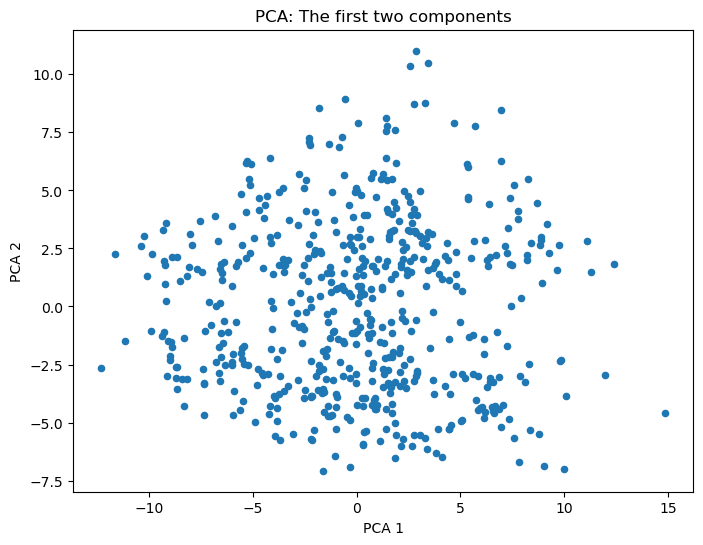

In [25]:
#vizualization with PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], s=20)
plt.title("PCA: The first two components")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [29]:
#Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(scaled_features)

C:\Users\Stefanija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [31]:
#K-means
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_features)

C:\Users\Stefanija\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [33]:
#Hierarhical clustering
linked = linkage(scaled_features, method='ward')
hierarchical_labels = fcluster(linked, 3, criterion='maxclust')

In [35]:
#DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

In [37]:
#Vizualization
def plot_clusters(labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=labels, palette='Set2')
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(title="Cluster")
    plt.show()

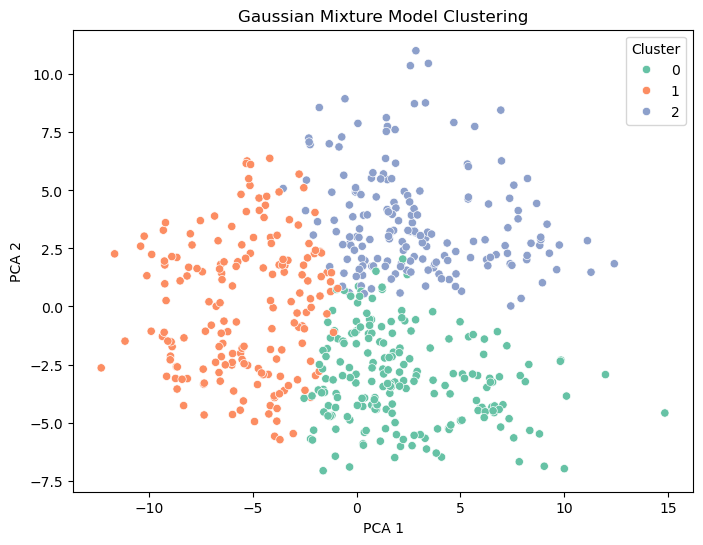

In [41]:
plot_clusters(gmm_labels, "Gaussian Mixture Model Clustering")

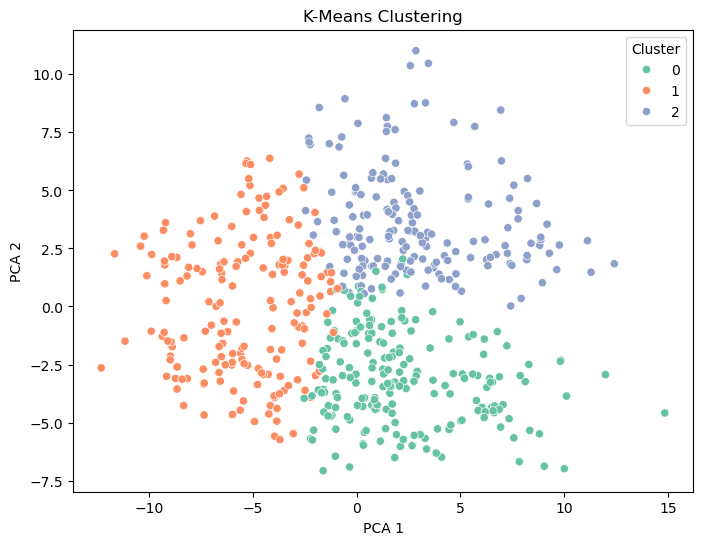

In [43]:
plot_clusters(kmeans_labels, "K-Means Clustering")

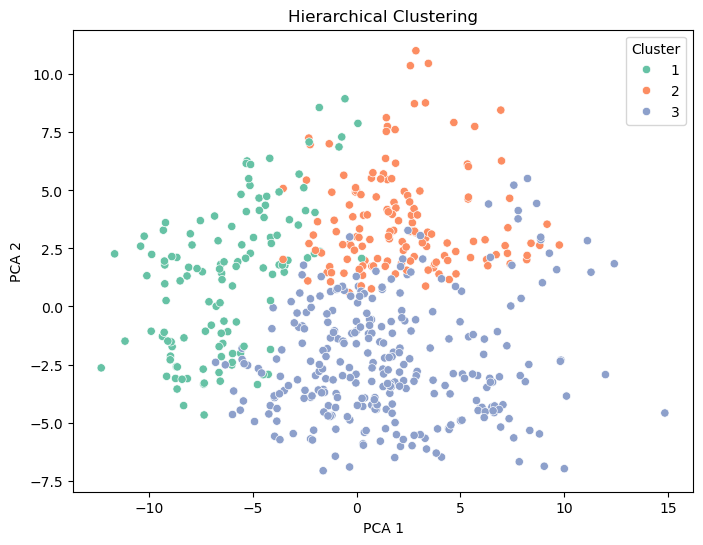

In [45]:
plot_clusters(hierarchical_labels, "Hierarchical Clustering")

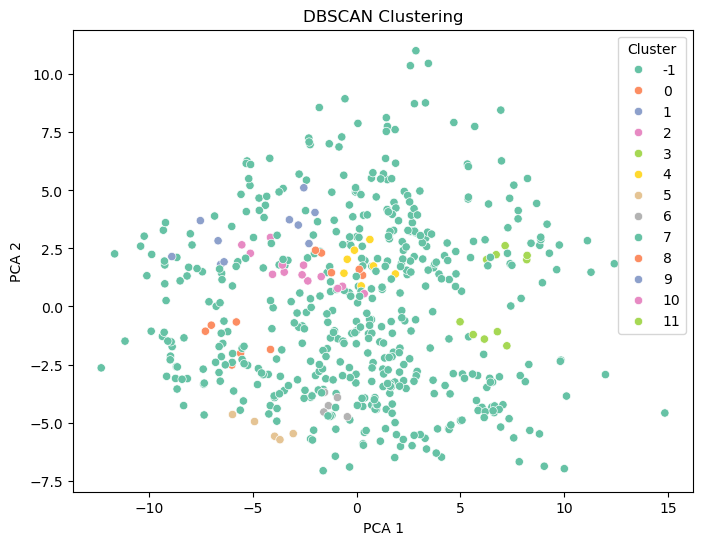

In [47]:
plot_clusters(dbscan_labels, "DBSCAN Clustering")

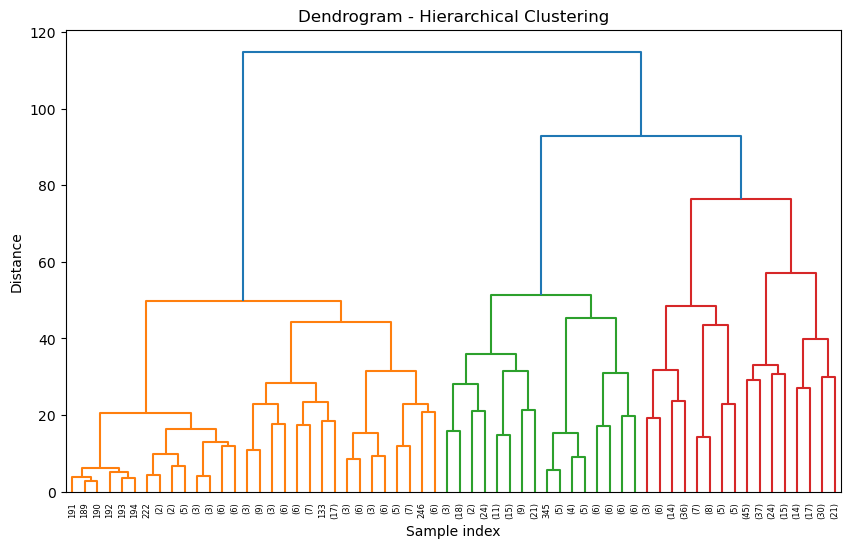

In [49]:
#Dendrogram vizualization for Hierarhical clustering
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()